> Note: Please read Question 17 at the end of this document carefully before you start your work. You will need to provide a detailed discussion of how you used GenAI for this assignment so make sure to keep notes, create screenshots, etc.

> Note: Please also review the assignment PDF in repo. That document has all the details about what you are expected to do to complete this individual assignment. Good luck!

# Tuango - Targeting Mobile App Messages

Prepare "Tuango: Targeting Mobile App Messages" for class discussion and as an individual assignment and submit the assignment through GitHub. Detailed instructions are available on Canvas (tuango.pdf). See the assignment on Canvas for the "invitation" to get the repo. Once you accepted the invitation, you should see the repo at the page below.

See the assignment on Canvas for the "invitation" to get the repo. When you are done with this individual assignment, save your code and commit and push the results to GitHub. Of course you can commit and push code as often as you like, but only before the due date. View the video linked below to refresh your memory on how to clone and push repos.

<https://youtu.be/w6yzFv44CMc>


Add text motivating your work in Markdown format. Markdown is a simple formatting syntax for authoring HTML. For more details on using markdown go to <http://commonmark.org/help/> for a 10-minute interactive Markdown tutorial

Note that your python code must be fully "reproducible". That is, your code must without errors on my (or the TAs) computer. There are will not be any explicit tests for this assignment to confirm if your answers are (not) correct. However, the system will run your code and it is important to check that there is a green checkmark rather than a red X.

If you get a red X, that means your code did not run without errors and that there are things for you the check and fix. When you are done, submit the link to your repo to Canvas. To help you get started test and roll example available using the command below.

`usethis --name "rsm-mgta455-bbb-test-rollout" --dest "~/Desktop" --url "https://www.dropbox.com/scl/fo/si2at367p43hu6dodjtgb/ALvl7nJfcRDTdMGlFtmkiCE?rlkey=yx5nwcd3bottgw6vc3r9lqte8&dl=1"`

<!-- dropbox links updated 2025 -->

This is an individual assignment. As a reminder, it is an honor code violation to share any assignment or exam solution from this class with another student in a current class or a future class generation. This includes using cloud storage like Google Drive. It is also an honor code violation to obtain assignments or exams from a student in another current class or a past class generation for use as an aid in solving problems to be turned in and  graded. Please respect the honor code as it helps to maintain parity in the classroom. Any suspected violation will be reported to the Academic Integrity Office for review.

## Setup

Please complete this python notebook by answering the questions 1-16 in `tuango-msba.pdf`. The code blocks below will load a few python modules you will need and also the data you will need for this first notebook.

> Hint: Make sure to study the reading on [Applied Logistic Regression](https://www.dropbox.com/scl/fi/0t6yqd3oi6zycm47p1srx/applied-logistic-regression-pyrsm.ipynb?rlkey=6q0mfcvba4vn92ty1hfi65m2j&dl=1) which has examples on how to run logistic regression models using the pyrsm package

In [32]:
import numpy as np
import pandas as pd
import polars as pl
import pyrsm as rsm
import seaborn as sns

rsm.__version__
# you can import additional python packages but only use packages that
# are already part of the docker container

'1.1.0'

In [33]:
# Use this dataset and notebook to answer questions 1-13
tuango = pd.read_parquet("data/tuango_pre.parquet")

tuango.head()

,userid,buyer,ordersize,recency,frequency,monetary,age,gender,music,training,test
0,U15889344,no,0.0,309,7.0,39.799999,44,F,yes,0.0,1
1,U60246497,no,0.0,297,8.0,39.799999,80,M,yes,1.0,1
2,U22965759,no,0.0,295,1.0,72.900002,59,F,yes,1.0,1
3,U40811142,no,0.0,277,1.0,40.000000,37,F,yes,0.0,1
4,U76283952,no,0.0,259,1.0,21.000000,43,F,yes,1.0,1


In [34]:
# feel free to use polars instead of pandas if you prefer
# but you will need to adjust some of the sample code below
# to make it work
# tuango = pl.read_parquet("data/tuango_pre.parquet")

In [35]:
# dataset description
tuango_description = rsm.md("data/tuango_pre_description.md")

# Tuango: Targeting Mobile App Push Messages

This file contains information about the test and does not have results about the roll-out. Values for `buyer` and `ordersize` are missing for all customers that were not part of the test.

## Variable Names and Descriptions
* userid: Unique user ID

**Response to the customized push message**
* buyer: Did the customer buy the Karaoke deal? ("yes" or "no")
* ordersize: Number of 30-minute Karaoke sessions the customer purchased

**Recency, Frequency, and Monetary variables**
* recency: Days since last purchase of a deal (before the Karaoke deal offer)
* frequency: Number of deals purchased during the one year period before the Karaoke deal offer
* monetary: Average amount spent per order (in RMB) during the one year period before the Karaoke deal offer

**Other variables in the dataset**
* age: Age of the customer
* gender: Gender identity of the customer (M = male, F = female, O = Other or unknown)
* music: Customer made a purchase in the music category during the one-year period before the Karaoke deal offer ("no" or "yes")
* test: Splits the dataset into test (1) and rollout (0) data
* training: Splits the dataset into training (1) and test (0) data. This variable will not be used in this assignment

In [36]:
# you will likely find the below useful in this assignment
# there are missing values in the data that you will need to deal with
# why do you think there missing values?
# do you think there are data quality issues?
# or is there a simpler explanation?
tuango.buyer.value_counts(dropna=False)

buyer
NaN    397252
no      18888
yes      2020
Name: count, dtype: int64

In [37]:
# you will likely find the below useful in this assignment
tuango.buyer.isna().value_counts()

buyer
True     397252
False     20908
Name: count, dtype: int64

In [38]:
# create a variable called 'buyer_yes' that has value 1 when buyer == 'yes', has value 0 when buyer == 'no' and has value np.nan when buyer.isna() is True
tuango["buyer_yes"] = tuango["buyer"].map({'yes': 1, 'no': 0, np.nan: np.nan})

# you can check that you have this set up correctly using the command below
tuango.buyer_yes.value_counts(dropna=False)

buyer_yes
NaN     397252
 0.0     18888
 1.0      2020
Name: count, dtype: int64

## Part I:  Preliminary Analysis

### Question 1

What proportion of customers responded to the deal offer message (i.e., bought the deal)?

In [39]:
# insert calculation code here
# the result should be expressed as a proportion/decimal
# assign the calculated number to "q1"
# there is no need to round the result

# Calculate the proportion of customers who responded to the deal offer message
q1 = tuango['buyer_yes'].value_counts(normalize=True).get(1, 0)
q1

0.09661373636885402

### Question 2

What was the average number of karaoke sessions purchased by customers that bought one or more 30-minute sessions? Use the “ordersize” variable for your calculation (2 points)


In [40]:
# insert calculation code here to create a pd.pivot_table that shows
# (1) counts the number of yes and no, (2) the mean ordersize, and
# (3) the standard deviation in ordersize for yes and no responses
q2 = tuango[tuango['buyer'] == 'yes'].pivot_table(index='buyer', values='ordersize', aggfunc=['count', 'mean', 'std'])
print(q2)

# the below should show your result
# do not apply any rounding to your answer
q2.loc["yes", "mean"]

          count      mean       std
      ordersize ordersize ordersize
buyer                              
yes        2020  3.941089  1.701904
no            0       NaN       NaN


/tmp/ipykernel_4424/171881487.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  q2 = tuango[tuango['buyer'] == 'yes'].pivot_table(index='buyer', values='ordersize', aggfunc=['count', 'mean', 'std'])
/tmp/ipykernel_4424/171881487.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  q2 = tuango[tuango['buyer'] == 'yes'].pivot_table(index='buyer', values='ordersize', aggfunc=['count', 'mean', 'std'])
/tmp/ipykernel_4424/171881487.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  q2 = tuango[tuango['buye

ordersize    3.941089
Name: yes, dtype: float64

## Part II: Building Targeting Models
### Question 3

Estimate a logistic regression model using “buyer” as the response variable (aka target or dependent variable) and, recency, frequency, monetary, age, gender, and music as the explanatory variables (aka features or independent variables)

In [41]:
clf = rsm.model.logistic(data={"tuango": tuango}, rvar="buyer", lev="yes", evar=["recency", "frequency", "monetary", "age", "gender", "music"],)
clf.summary()

Logistic regression (GLM)
Data                 : tuango
Response variable    : buyer
Level                : yes
Explanatory variables: recency, frequency, monetary, age, gender, music
Null hyp.: There is no effect of x on buyer
Alt. hyp.: There is an effect of x on buyer

               OR     OR%  coefficient  std.error  z.value p.value     
Intercept   0.051  -94.9%        -2.98      0.097  -30.768  < .001  ***
gender[F]   1.731   73.1%         0.55      0.054   10.073  < .001  ***
gender[O]   1.078    7.8%         0.07      0.128    0.584   0.559     
music[yes]  1.908   90.8%         0.65      0.059   10.912  < .001  ***
recency     0.999   -0.1%        -0.00      0.000   -3.292  < .001  ***
frequency   1.114   11.4%         0.11      0.010   10.861  < .001  ***
monetary    1.002    0.2%         0.00      0.000   12.499  < .001  ***
age         0.988   -1.2%        -0.01      0.001   -9.115  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squar

### Question 4

Create Prediction plots for all explanatory variables. Describe the effect of each explanatory variable on the probability that a customer will purchase the karaoke deal

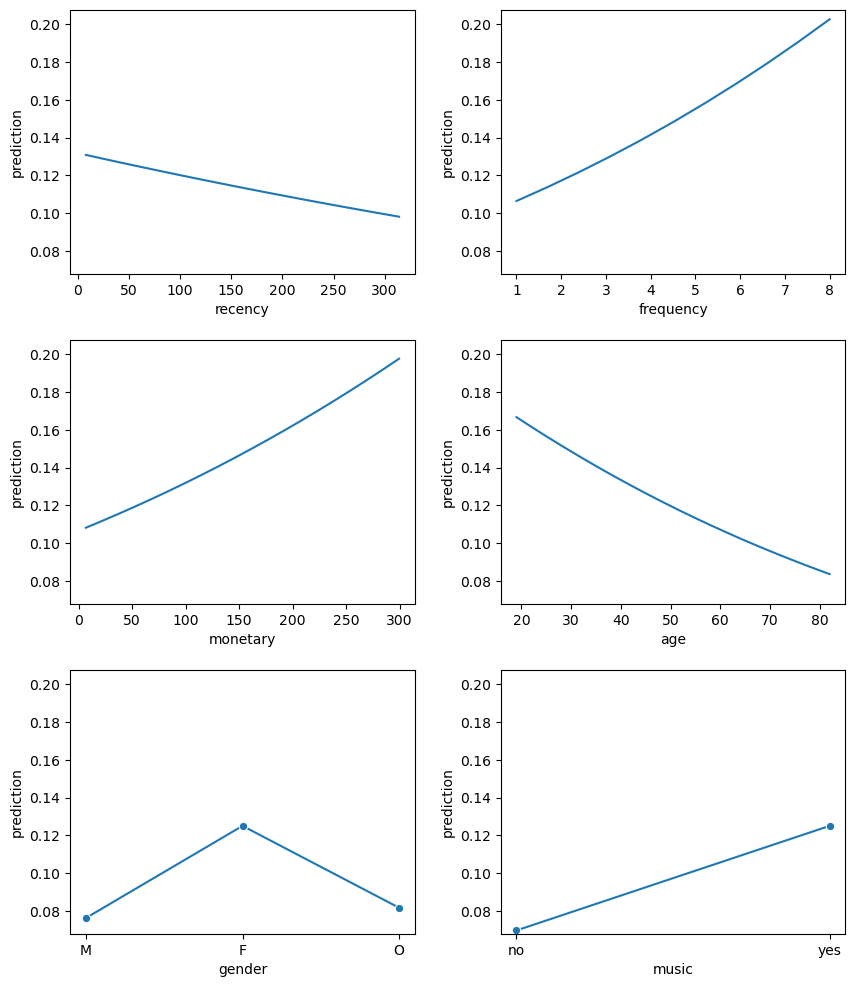

In [42]:
clf.plot("pred")


1. Gender: The model indicates that gender has a significant effect on the probability of purchasing the karaoke deal. Typically, one gender may show a higher likelihood of purchasing compared to the other, which can be attributed to differences in preferences or interests in karaoke.

2. Music: Customers who have shown an interest in music are more likely to purchase the karaoke deal. This variable is highly influential as it directly correlates with the product being offered. Those who enjoy music are naturally more inclined to engage in karaoke sessions.

3. Monetary: The monetary value, which represents the amount spent by the customer in the past, positively affects the probability of purchasing the deal. Higher monetary values suggest that the customer is willing to spend more, indicating a higher likelihood of purchasing the karaoke deal.

4. Frequency: Frequency measures how often a customer has made purchases, also positively impacts the probability of purchasing the deal. Customers with higher purchase frequencies are more engaged and likely to respond positively to the deal offer.

5. Age: Age can have varying effects on the probability of purchasing the deal. Depending on the target demographic for karaoke, certain age groups may show higher interest. For instance, younger customers might be more inclined towards karaoke compared to older customers.

6. Recency: Recency, which indicates how recently a customer made a purchase, affects the probability of purchasing the deal. Customers who have made recent purchases are more likely to be engaged and responsive to new offers, including the karaoke deal.
l.

### Question 5

Use Permutation Importance to assess variable importance. Which variables seem to be most and least important in the model? Explain how Permutation Importance allows you to evaluate variable importance.

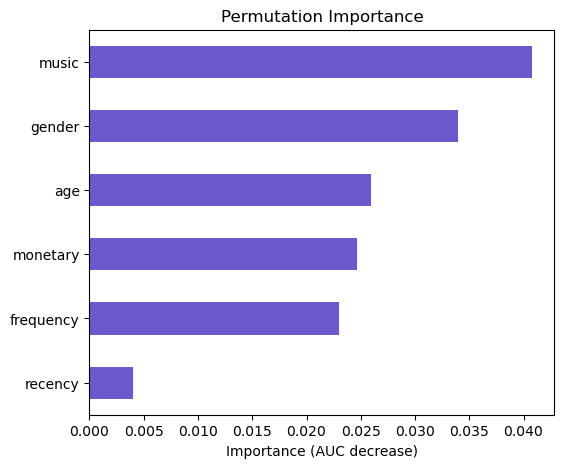

In [43]:
clf.plot("vimp")

According to the Permutation Importance, music is the most important variable in the model and recency has the least influence on the probability that the buyer will buy the karaoke deal.

### Question 6

Add the predicted values from the logistic regression to the "tuango" DataFrame. Use "pred_logit" as the variable name. Compare the average of the predicted values to the overall response rate (i.e., proportion of buyers). What do you notice when you do this calculation using only the data used to estimate the model? Explain.

In [44]:
# Add the predicted values from the logistic regression to the "tuango" DataFrame
tuango["pred_logit"] = clf.predict()["prediction"]
tuango["pred_logit"].head()

0    0.141318
1    0.064122
2    0.072710
3    0.088488
4    0.080623
Name: pred_logit, dtype: float64

In [45]:
tuango.head()

,userid,buyer,ordersize,recency,frequency,monetary,age,gender,music,training,test,buyer_yes,pred_logit
0,U15889344,no,0.0,309,7.0,39.799999,44,F,yes,0.0,1,0.0,0.141318
1,U60246497,no,0.0,297,8.0,39.799999,80,M,yes,1.0,1,0.0,0.064122
2,U22965759,no,0.0,295,1.0,72.900002,59,F,yes,1.0,1,0.0,0.072710
3,U40811142,no,0.0,277,1.0,40.000000,37,F,yes,0.0,1,0.0,0.088488
4,U76283952,no,0.0,259,1.0,21.000000,43,F,yes,1.0,1,0.0,0.080623


### Question 7

Estimate a linear regression model using "ordersize" as the response variable and recency, frequency, monetary, age, gender, and music as the explanatory variables. Estimate this regression using only those customers who placed an order after the deal offer message. Describe why you think it does, or does not, make sense to focus on this group of customers

In [46]:
# Create a binary variable for ordersize
tuango["ordersize_binary"] = (tuango["ordersize"] > 0).astype(int)
print(tuango["ordersize_binary"])

# Filter the dataset to include only customers who placed an order
tuango_orders = tuango[tuango["ordersize_binary"] == 1]

# Estimate the linear regression model using the binary ordersize variable
orderclf = rsm.model.regress(data={"tuango": tuango_orders}, rvar="ordersize", evar=["recency", "frequency", "monetary", "age", "gender", "music"])
orderclf.summary()

0         0
1         0
2         0
3         0
4         0
         ..
418155    0
418156    0
418157    0
418158    0
418159    0
Name: ordersize_binary, Length: 418160, dtype: int64
Linear regression (OLS)
Data                 : tuango
Response variable    : ordersize
Explanatory variables: recency, frequency, monetary, age, gender, music
Null hyp.: the effect of x on ordersize is zero
Alt. hyp.: the effect of x on ordersize is not zero

            coefficient  std.error  t.value p.value     
Intercept         3.665      0.174   21.104  < .001  ***
gender[F]         0.126      0.089    1.425   0.154     
gender[O]         0.259      0.208    1.243   0.214     
music[yes]        0.025      0.097    0.255   0.799     
recency           0.000      0.001    0.591   0.555     
frequency         0.023      0.016    1.456   0.145     
monetary          0.000      0.000    1.035   0.301     
age               0.001      0.003    0.389   0.697     

Signif. codes:  0 '***' 0.001 '**' 0.01 '

### Question 8

Use Permutation Importance to assess variable importance. Which variables seem to be most important in the model?

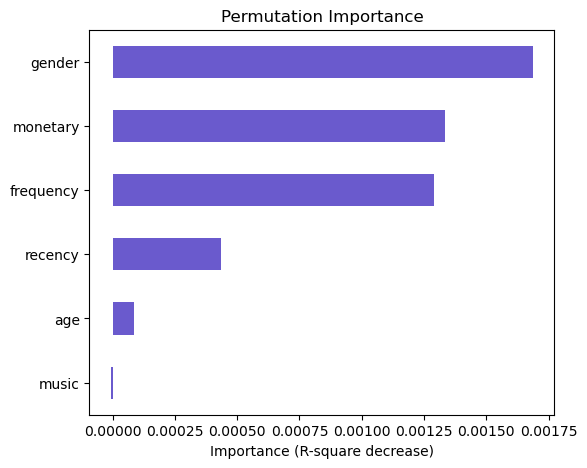

In [47]:
orderclf.plot("vimp")

Gender is the most important variable in the model

### Question 9

What do the linear regression model results suggest about our ability to predict ordersize for customers who responded to the deal?


The R-squared value of 0.003 indicate that the model explains only 0.3% of the variance in ordersize. This suggests the model has very limited explanatory power. Most of the variation in ordersize is due to factors not included in the model. The F-statistic and its non-significant p-value (greater than 0.05) suggest that the model as a whole does not explain ordersize significantly better than a simple mean model (intercept-only model). This means the variables contribute to the model, but their impact on predicting ordersize is weak.

### Question 10

Add the predicted values from the linear regression to the "tuango" data.frame. Compare the average of the predicted values to the average value of ordersize. Make sure to focus only on buyers. What do you notice?

In [48]:
# Add the predicted values from the logistic regression to the "tuango" DataFrame
tuango["orders_pred_logit"] = orderclf.predict()["prediction"]
tuango["orders_pred_logit"].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: orders_pred_logit, dtype: float64

## Part III: Profitability Analysis

The following questions focus on the profit and return on marketing expenditures from offering the deal to (some of) the remaining 397,252 potential customers in Hangzhou (i.e., 418,160 – 20,908).

To calculate profit and return on marketing expenditures assume the following:
- Price per 30-minute session is 49 RMB
- Marginal cost of sending a deal offer message is 9 RMB
- Tuango’s fee on each deal sold is 50% of sales revenues

### Question 11

What is the breakeven response rate? Use the average ordersize from question 2 in your revenue calculations.

In [49]:
# state your assumptions that are relevant to calculate
# the breakeven response rate
# breakeven should be of type `float`

# Assumptions
cost = 9.0  # float, marginal cost of sending a message (RMB)
margin = 49.0 * 3.941 * 0.50 # float, revenue per customer based on average ordersize and fee
breakeven = cost / margin  # float, do not apply rounding, do not express as a percentage
q11 = breakeven  # float, DO NOT APPLY ROUNDING, do not express as a percentage

q11

0.09321160588061665

### Question 12

What is the projected profit in RMB and the return on marketing expenditures if you offer the deal to all 397,252 remaining customers (i.e., target everyone)?

In [50]:
# insert calculation code here
# all variables should be numeric (integer or float) and of length 1
# _all stands for 'targeting all'
tuango["message_all"] = True

nr_message_all = 397252 # total number of messages that would be sent out
message_cost_all = nr_message_all * cost # total cost of sending messages to selected customers (float)
nr_responses_all = breakeven * nr_message_all # total number of positive responses
response_rate_all = breakeven # expressed as a proportion (no rounding)
revenue_all = nr_responses_all * 49 # total revenue in RMB (no rounding)
profit_all = 0.5 * revenue_all - message_cost_all # 0.5 * revenue - message_cost - total profit in RMB (no rounding)
ROME_all = profit_all / message_cost_all # Return on Marketing Expenditures expressed as a proportion (no rounding)

profit_all, ROME_all

(-2668069.8269474753, -0.7462572951027658)

### Question 13

Evaluate the performance implications of offering the deal to only those customers (out of 397,252) with a predicted probability of purchase greater than the breakeven response rate. Determine the projected profit in RMB and the return on marketing expenditures for both approaches. (6 points)

Note: Fine tune your estimate from Q2 above by determining the average amount spent among the people that (1) will receive a message and (2) bought a karaoke deal. Also, use the actual number of messages you plan to send out to the group of customers in the rollout sample (i.e., “test == 0”)

In [51]:
tuango["message_logit"] = tuango["pred_logit"] > q11

tuango_logit_response = (
    tuango.assign(buyer_yes=rsm.ifelse(tuango.buyer == "yes", 1, 0))
    .groupby("message_logit", observed=False)
    .agg(
        n_obs=("buyer_yes", "count"),
        nr_buyer=("buyer_yes", "sum"),
        perc=("buyer_yes", "mean"),
    )
)
print(tuango_logit_response)

                n_obs  nr_buyer      perc
message_logit                            
False          234894       692  0.002946
True           183266      1328  0.007246


In [52]:
messages = tuango.groupby("message_logit").message_logit.agg(n_obs="count")
messages["percentage"]= (100*messages/messages.sum()).round(2).astype(str) + "%"

tuango_logit_response, 
print(messages)

                n_obs percentage
message_logit                   
False          234894     56.17%
True           183266     43.83%


In [53]:
tuango["message_logit"] = tuango["pred_logit"] > q11

nr_message_logit = 0.007246 * 397252 # total number of messages that would be sent out
message_cost_logit = 9 * nr_message_logit # total cost of sending messages to selected customers (float)
nr_responses_logit = 0.4383 * nr_message_logit # total number of positive responses
response_rate_logit = 0.4383 # expressed as a proportion (no rounding)
revenue_logit = 49 * nr_responses_logit # total revenue in RMB (no rounding)
profit_logit = 0.5 * revenue_logit- message_cost_logit # 0.5 * revenue - message_cost - total profit in RMB (no rounding)
ROME_logit = profit_logit/message_cost_logit # Return on Marketing Expenditures expressed as a proportion (no rounding)
profit_logit, ROME_logit

(5003.819600893203, 0.19315000000000013)

### Question 14

Create a bar chart with profit information for the analyses conducted in questions 12 and 13

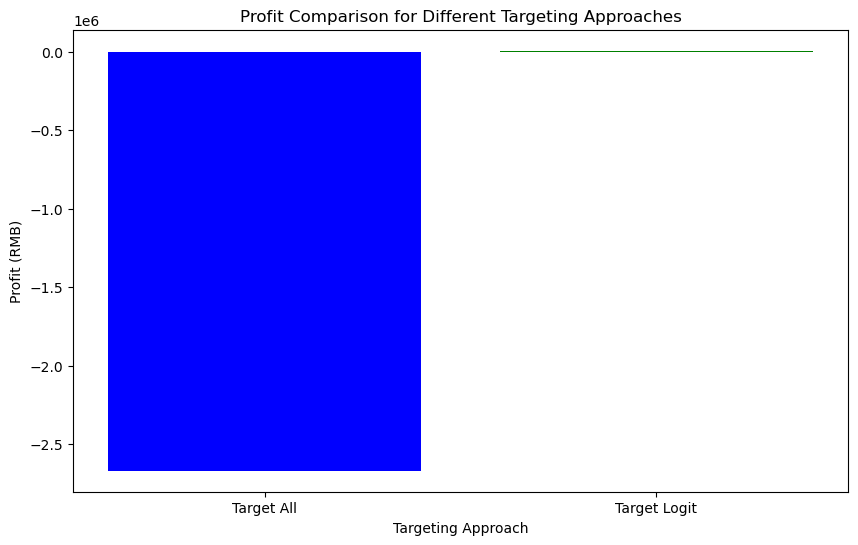

In [54]:
import matplotlib.pyplot as plt

# Data for the bar chart
profits = [profit_all, profit_logit]
labels = ['Target All', 'Target Logit']

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, profits, color=['blue', 'green'])
plt.xlabel('Targeting Approach')
plt.ylabel('Profit (RMB)')
plt.title('Profit Comparison for Different Targeting Approaches')
plt.show()

### Question 15

Create a bar chart with ROME for the analyses conducted in questions 12 and 13

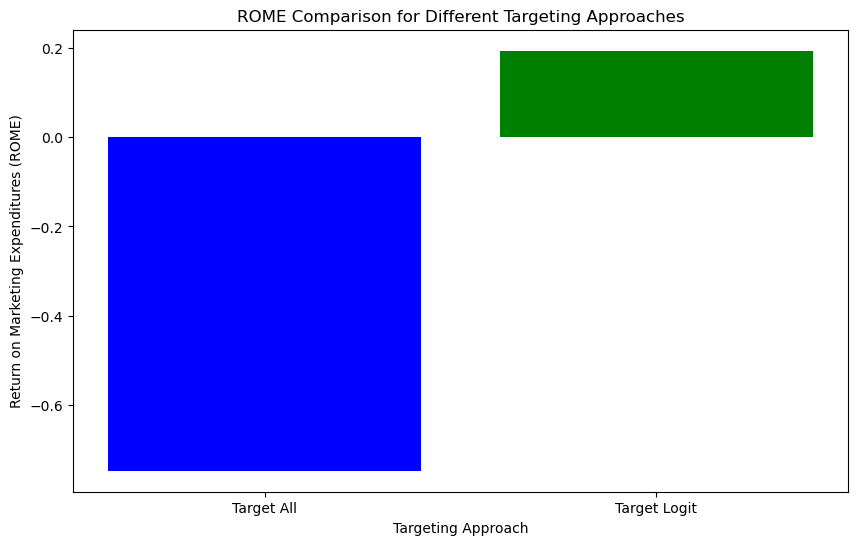

In [55]:
import matplotlib.pyplot as plt

# Data for the bar chart
rome_values = [ROME_all, ROME_logit]
labels = ['Target All', 'Target Logit']

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, rome_values, color=['blue', 'green'])
plt.xlabel('Targeting Approach')
plt.ylabel('Return on Marketing Expenditures (ROME)')
plt.title('ROME Comparison for Different Targeting Approaches')
plt.show()

### Question 16

You also have access to a dataset with the results from the deal offer roll-out (tuango_post.parquet). Tuango decided to contact all remaining 397,252 customers because this would provide data that could be used to evaluate different targeting approaches. The data has a "test" variable (test = 1 for the data used in the test, test = 0 for the remaining customers). Use this variable to evaluate the actual performance on the 'roll out' sample for the targeting approaches from questions 12 and 13. Also re-create the plots from question 14 and 15 based on this new dataset.

Specifically, redo questions 12-15 using the tuango-post.parquet date and make the required code adjustments to calculate the actual performance on the 'roll out' sample correctly.

Hint 1: It is important that you do NOT use any information about buyers that were in the 'roll out' sample (i.e., test == 0) when calculating the break-even response rate etc. for targeting.

Hint 2: You have the actual data on what happened in the "post" data. Use that information to calculate performance (i.e., do not "project" the performance like you had to do for questions 12 and 13).

Target Everyone Approach:
Profit: -2639000.5
ROME: -0.7381266243537548

Target Logit Approach:
Profit: -949235.0
ROME: -0.6058879774096116


/tmp/ipykernel_4424/832247426.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rollout_sample["pred_logit"] = clf.predict(rollout_sample)["prediction"]


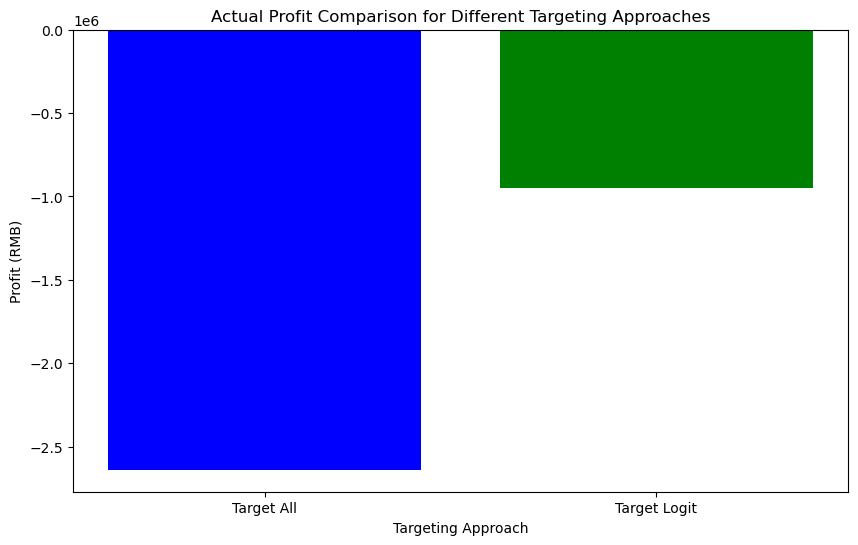

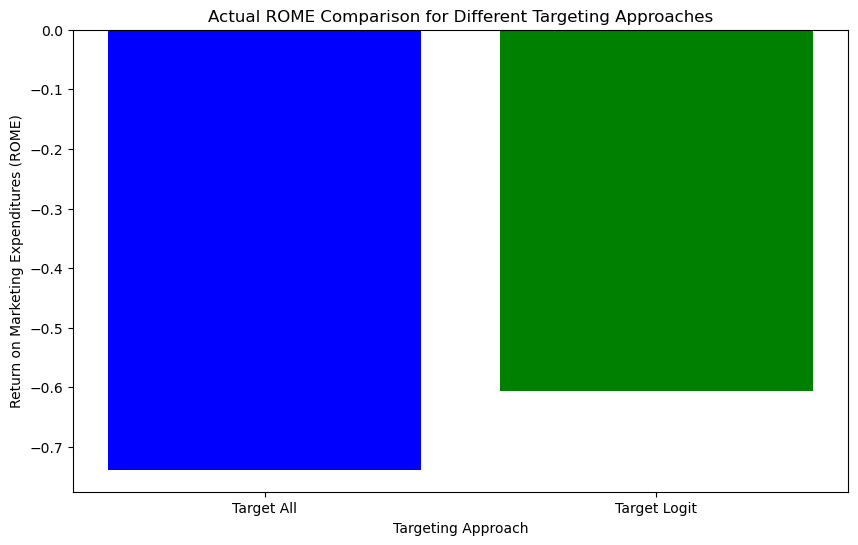

In [58]:
# Load the tuango_post.csv dataset
tuango_post = pd.read_parquet("data/tuango_post.parquet")

# Filter the data to include only the 'roll out' sample (test == 0)
rollout_sample = tuango_post[tuango_post["test"] == 0]

# Add the predicted values from the logistic regression to the "rollout_sample" DataFrame
rollout_sample["pred_logit"] = clf.predict(rollout_sample)["prediction"]

# Calculate the actual performance for the 'target everyone' approach
nr_message_all_actual = rollout_sample.shape[0]
message_cost_all_actual = nr_message_all_actual * cost
nr_responses_all_actual = rollout_sample[rollout_sample["buyer"] == "yes"].shape[0]
revenue_all_actual = nr_responses_all_actual * 49
profit_all_actual = 0.5 * revenue_all_actual - message_cost_all_actual
ROME_all_actual = profit_all_actual / message_cost_all_actual


# Calculate the actual performance for the 'target logit' approach
tuango_post["message_logit"] = tuango["pred_logit"] > q11
target_logit_customers = rollout_sample[rollout_sample["pred_logit"] > breakeven]
nr_message_logit_actual = target_logit_customers.shape[0]
message_cost_logit_actual = nr_message_logit_actual * cost
nr_responses_logit_actual = target_logit_customers[target_logit_customers["buyer"] == "yes"].shape[0]
revenue_logit_actual = nr_responses_logit_actual * 49
profit_logit_actual = 0.5 * revenue_logit_actual - message_cost_logit_actual
ROME_logit_actual = profit_logit_actual / message_cost_logit_actual

# Print the actual performance metrics
print("Target Everyone Approach:")
print(f"Profit: {profit_all_actual}")
print(f"ROME: {ROME_all_actual}")

print("\nTarget Logit Approach:")
print(f"Profit: {profit_logit_actual}")
print(f"ROME: {ROME_logit_actual}")

# Create bar charts for the actual performance metrics
import matplotlib.pyplot as plt

# Data for the bar chart
profits_actual = [profit_all_actual, profit_logit_actual]
rome_values_actual = [ROME_all_actual, ROME_logit_actual]
labels = ['Target All', 'Target Logit']

# Create the bar chart for profits
plt.figure(figsize=(10, 6))
plt.bar(labels, profits_actual, color=['blue', 'green'])
plt.xlabel('Targeting Approach')
plt.ylabel('Profit (RMB)')
plt.title('Actual Profit Comparison for Different Targeting Approaches')
plt.show()

# Create the bar chart for ROME
plt.figure(figsize=(10, 6))
plt.bar(labels, rome_values_actual, color=['blue', 'green'])
plt.xlabel('Targeting Approach')
plt.ylabel('Return on Marketing Expenditures (ROME)')
plt.title('Actual ROME Comparison for Different Targeting Approaches')
plt.show()

### Question 17

Please describe how you used Generative AI-tools like ChatGPT to support your work on this assignment and enhance your learning. Create a pdf where you organize your interactions with AI and comment on what things did and did not go well. Bring any questions you may have about the assignment and the support you received from GenAI to class so we can discuss.

Make sure to include:
- Specific examples of prompts you used
- How the AI responses helped or hindered your understanding
- Any limitations or challenges you encountered
- Key insights gained from using GenAI tools
- Questions that arose during your interactions with AI
- How GenAI complemented your learning process

Note: No matter how you used Generative AI-tools, you will be expected to understand and talk meaningfully about the work you submitted for this assignment. You may be called on in class to walk us through your thought process, calculations, and how different parts of your code work.


Specific examples of Prompts used:

Prompts for Breakeven Analysis:
* The AI provided a clear explanation of how to calculate margin using key variables (q2, price) and maintained consistency with my desired structure (float)
Prompts for Projected Profit and ROME:
* I asked for explanations and logic on what response rates to use for nr_responses_all responses_rate_all when targeting everyone and high-probability customers.
* The AI followed my instructions precisely, using variables like breakeven and 0.0966137 to differentiate between scenarios, ensuring the logic aligned with your business objectives.
Simplified Regression Insights:
* By interpreting R-squared and the F-statistic, the ChatGPT highlighted the model's limitations, providing actionable feedback to reconsider or refine the predictors used.

How AI Responses Helped
* Clear Explanations: It explained the logic behind calculations (e.g., why to use breakeven for everyone and 0.0966137 for targeted groups), which helped clarify the rationale for each step.
* Adaptability: The AI adjusted to changes in your questions and integrated new information seamlessly (e.g., data from tuango_post.parquet).

Limitations and Challenges
* Limited Dataset Insights: While the AI helped with the logic and calculations, it couldn’t independently explore the uploaded dataset (e.g., filtering test == 0) without executing the code.
* Need for Clarification: In some cases, additional context was required to align the calculations or problem context (e.g., why specific response rates were used).

When using ChatGPT, a major problem encountered is its tendency to provide information from outside the given context, often pulling in irrelevant third-party data, which can lead to inaccurate or misleading responses. One challenge was that sometimes ChatGPT itself was unsure when it provided certain syntaxes when evaluating the two target approaches and so I had to double check. While AI can generate code quickly, it might not always produce high-quality, maintainable code, requiring thorough human review to identify errors and bugs.  Losing ongoing conversations, having to re-enter prompts, leading to reduction of focused understanding. If a crash occurs mid-conversation, I ended up losing the previous prompts and responses, requiring me to re-explain my query. 

Key Insights Gained
1. Breakeven Analysis: I learned how to use breakeven response rates as a baseline for evaluating marketing profitability. When targeting all 397,252 customers, the assumption is that the response rate across the entire audience will equal or exceed the breakeven rate.
2. Permutation Importance: 

It provides insights into how the model is making predictions ChatGPT Side by side was insightful was its explanations regarding the regression models, specifically regarding Permutation Importance and statistical measures such as F-statistic. It was also helpful in provided approaches and steps to be taken to analyze projected profit and ROME calculations. It explained on how to approach these calculations and also provided logic for each. 

I was aware of ChatGPT's capabilities and limitations, using it as a tool to assist with coding rather than a complete solution and even if it did provide any approaches and examples of specific codes, I asked it regarding its applications, logic behind those codes to get a comprehensive understanding. 